<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- ÌôòÍ≤ΩÏÑ§Ï†ï

In [ ]:
!pip uninstall tensorflow
!pip uninstall kerasy

In [ ]:
!pip install tensorflow==2.6.0
!pip install keras==2.6.0

In [ ]:
!pip3 install pixellib

In [2]:
from importlib_metadata import version
import cv2
import pixellib

print(cv2.__version__)
print(version('pixellib'))

4.6.0
0.7.1


## 1. Í∏∞Î≥∏ Ïù∏Î¨º ÏÇ¨ÏßÑ



In [4]:
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(625, 500, 3)


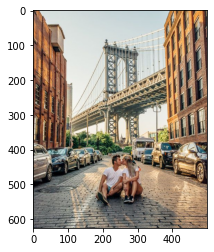

In [8]:
img_path = "/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/NYC's Top 10 Most Instagram Worthy Spots.png"
img_person = cv2.imread("/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/NYC's Top 10 Most Instagram Worthy Spots.png") 

print(img_person.shape)
plt.imshow(cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
# Ï†ÄÏû•Ìï† ÌååÏùº Ïù¥Î¶ÑÏùÑ Í≤∞Ï†ïÌï©ÎãàÎã§
model_file = ('/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLibÍ∞Ä Ï†úÍ≥µÌïòÎäî Î™®Îç∏Ïùò urlÏûÖÎãàÎã§
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# Îã§Ïö¥Î°úÎìúÎ•º ÏãúÏûëÌï©ÎãàÎã§
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/model/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7fdc08030110>)

In [7]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [9]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [10]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

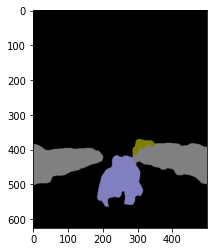

In [11]:
plt.imshow(output)
plt.show()

In [12]:
segvalues

{'class_ids': array([ 0,  6,  7, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [13]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bus
car
person


In [14]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [15]:
colormap[15]

array([192, 128, 128])

BGR Ïª¨Îü¨Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê RGBÎ°ú Î∞îÍøîÏ§å

In [16]:
seg_color = (128,128,192)

(625, 500)


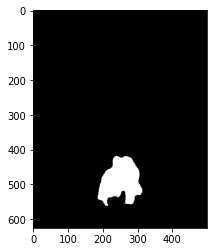

In [17]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

ÏõêÎûò Ïù¥ÎØ∏ÏßÄÏôÄ Í≤πÏ≥êÏÑú segmentationÏù¥ Ïûò ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

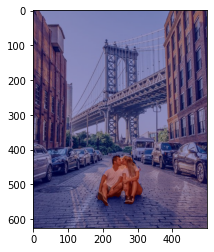

In [19]:
img_show = img_person.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Î∞∞Í≤Ω ÌùêÎ¶¨Í≤å ÌïòÍ∏∞

blurÌï®Ïàò ÏÇ¨Ïö©

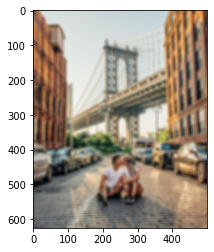

In [23]:
img_person_blur = cv2.blur(img_person, (10,10))  
plt.imshow(cv2.cvtColor(img_person_blur, cv2.COLOR_BGR2RGB))
plt.show()

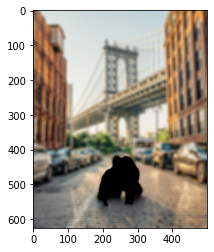

In [25]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_person_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

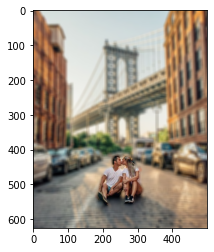

In [26]:
img_concat = np.where(img_mask_color==255, img_person, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 2. Í≥†ÏñëÏù¥ ÏÇ¨ÏßÑ

- Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

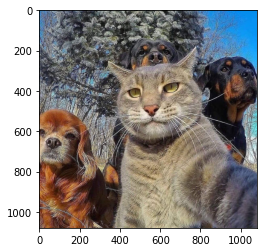

In [28]:
img_path_cat = "/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/Good Morning üòº.png"
img_cat = cv2.imread(img_path_cat)
plt.imshow(cv2.cvtColor(img_cat, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
segvalues, output = model.segmentAsPascalvoc(img_path_cat)

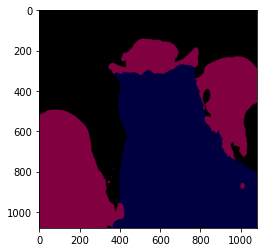

In [30]:
plt.imshow(output)
plt.show()

In [31]:
segvalues

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]])}

- 12Î≤àÏù¥ Í∞ú, 8Î≤àÏù¥ Í≥†ÏñëÏù¥

In [34]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


In [35]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [38]:
colormap[8]

array([64,  0,  0])

In [39]:
seg_color = (0,0,64)

(1080, 1080)


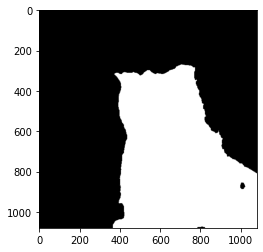

In [40]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

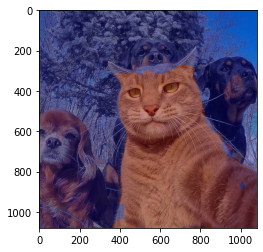

In [41]:
img_show = img_cat.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

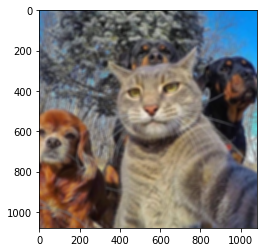

In [46]:
img_cat_blur = cv2.blur(img_cat, (15,15))  
plt.imshow(cv2.cvtColor(img_cat_blur, cv2.COLOR_BGR2RGB))
plt.show()

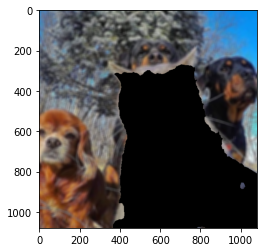

In [47]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_cat_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

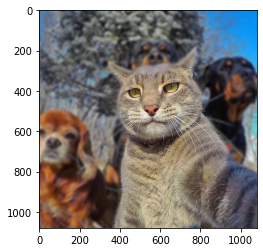

True

In [49]:
img_concat = np.where(img_mask_color==255, img_cat, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# Î∏îÎü¨ Ï≤òÎ¶¨Ìïú Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•
cv2.imwrite('/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/Í≥†ÏñëÏù¥.png',img_concat)

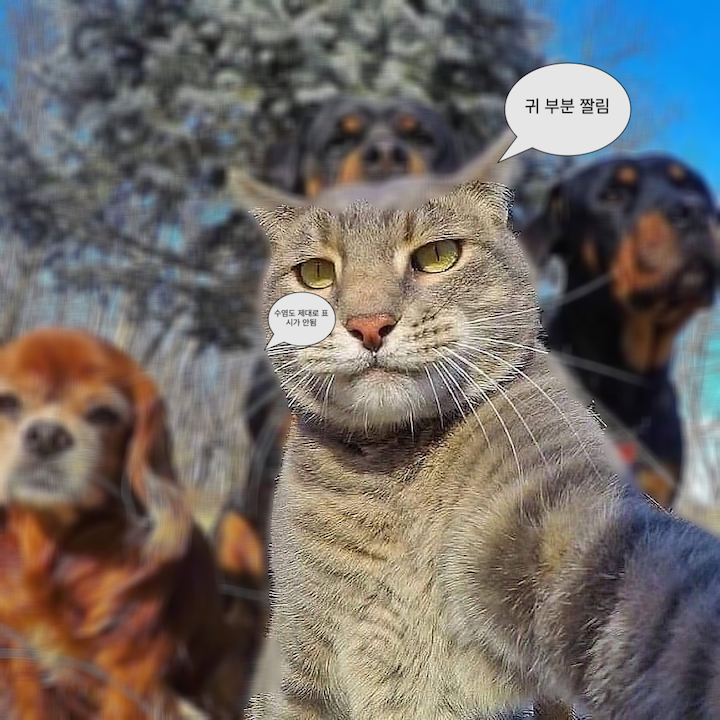

## 3. ÌÅ¨Î°úÎßàÌÇ§

- Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞

(625, 500, 3)


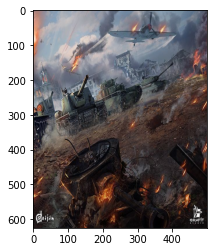

In [53]:
# Î∞∞Í≤ΩÏúºÎ°ú Ïì∏ Ïù¥ÎØ∏ÏßÄ
img_war_path = '/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/Warthunder.png'
img_war = cv2.imread(img_war_path)
print(img_war.shape)
plt.imshow(cv2.cvtColor(img_war, cv2.COLOR_BGR2RGB))
plt.show()

(625, 500, 3)


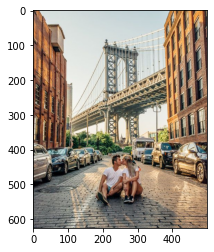

In [52]:
# Î∂ôÏó¨ÎÑ£ÏùÑ Ïù¥ÎØ∏ÏßÄ
img_person_path = "/content/drive/MyDrive/AIFFEL/EX/9. ·Ñã·Öµ·Ü´·ÑÜ·ÖÆ·ÜØ·Ñâ·Ö°·Ñå·Öµ·Ü´ ·ÑÜ·Ö°·Ü´·ÑÉ·Ö≥·ÜØ·ÑÄ·Öµ/NYC's Top 10 Most Instagram Worthy Spots.png"
img_person = cv2.imread(img_person_path)
print(img_person.shape)
plt.imshow(cv2.cvtColor(img_person, cv2.COLOR_BGR2RGB))
plt.show()

In [54]:
segvalues, output = model.segmentAsPascalvoc(img_person_path)

In [55]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [56]:
colormap[15]

array([192, 128, 128])

In [57]:
seg_color = (128, 128, 192)

(625, 500)


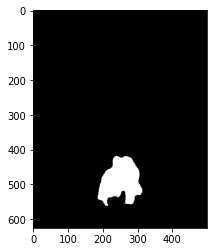

In [66]:
# outputÏùò ÌîΩÏÖÄ Î≥ÑÎ°ú ÏÉâÏÉÅÏù¥ seg_colorÏôÄ Í∞ôÎã§Î©¥ 1(True), Îã§Î•¥Îã§Î©¥ 0(False)Ïù¥ Îê©ÎãàÎã§
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

In [67]:
img_show = img_war.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

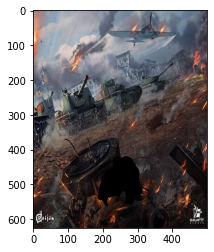

In [69]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg = cv2.bitwise_and(img_war, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg, cv2.COLOR_BGR2RGB))
plt.show()

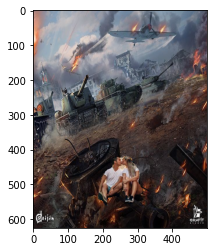

In [72]:
img_concat = np.where(img_mask_color==255, img_person, img_bg)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 4. ÌöåÍ≥† & Î¨∏Ï†úÌï¥Í≤∞ Î∞©Î≤ï 

- Î¨∏Ï†úÌï¥Í≤∞ Î∞©Î≤ï ÏÉùÍ∞Å

Î®ºÏ†Ä Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∞Îäî Ïù¥Ïú†Î•º Ï∂îÏ∏°Ìï¥Î≥¥Î©¥ Í≥†ÏñëÏù¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú segmentationÏùÑ Ìï† Îïå Ïù¥ÎØ∏ÏßÄÍ∞íÏùÑ Í∏∞Î∞òÏúºÎ°ú Íµ¨Î∂ÑÌï¥ÏÑú Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥ Í≤É Í∞ôÎã§. ÏïÑÎßàÎèÑ Îí§ÏóêÏûàÎäî ÎÇòÎ≠áÏûé ÏÉâÏù¥Îûë Í≥†ÏñëÏù¥ ÌÑ∏ ÏÉâÍπîÏù¥Îûë ÎπÑÏä∑Ìï¥ÏÑú Í∑∏Îü∞ Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥ Í≤É Í∞ôÏùÄÎç∞ ÏöîÏ¶ò ÎßéÏù¥Îì§ Ïó∞Íµ¨Ï§ëÏù∏ ToF Í∏∞Ïà†ÏùÑ Ïù¥Ïö©Ìï¥ ÏÇ¨ÏßÑÏóê Í∞Å Î¨ºÏ≤¥Îì§Ïùò Í±∞Î¶¨Ïóê ÎåÄÌïú Ï†ïÎ≥¥ÎèÑ ÎÑ£Í≥†, Í∑∏ Ï†ïÎ≥¥Î•º Ïù¥Ïö©ÌïòÎ©¥ segmentationÏù¥ Ï¢Ä Îçî Ìé∏Î¶¨Ìï¥Ïßà Í≤É Í∞ôÎã§. 

ÏßÄÍ∏àÍπåÏßÄ Ïπ¥Î©îÎùºÎ°ú ÏÇ¨ÏßÑÏùÑ Ï∞çÏúºÎ©¥ 3Ï±ÑÎÑê Îç∞Ïù¥ÌÑ∞(R,G,B)Î°ú Ï†ÄÏû•ÏùÑ ÌñàÏßÄÎßå Ïù¥Ï†ú ToFÎ•º Ïù¥Ïö©Ìï¥ ÏÇ¨ÏßÑÏùÑ Ï∞çÏúºÎ©¥ Í±∞Í∏∞Ïóê Í±∞Î¶¨Ïóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ìï®Íªò Îã¥ÏïÑÏÑú Ï†ÄÏû•ÌïòÎäîÍ±∞Îã§. ÌïòÏßÄÎßå Í±∞Î¶¨Îäî Ïó∞ÏÜçÏ†ÅÏù∏ Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïñ¥ÎäêÏ†ïÎèÑ Íµ¨Í∞ÑÌôîÎ•º ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Î°ùÏùÑ Ìï¥Ï£ºÎ©¥ Îê† Í≤É Í∞ôÎã§. 

Í∑∏Î†áÍ≤å ÎêúÎã§Î©¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÌîΩÏÖÄÍ∞íÏù¥ ÏÑúÎ°ú ÎπÑÏä∑ÌïòÍ±∞ÎÇò Í∞ôÎã§Í≥† ÌïòÎçîÎùºÍ≥† ÎëòÏùò Í±∞Î¶¨Í∞Ä Îã§Î•¥Î©¥ Îã§Î•∏ Î¨ºÏ≤¥Î°ú Ïù∏ÏãùÌï¥ segmentationÏùò ÏÑ±Îä•Ïù¥ Îçî Ïò¨ÎùºÍ∞àÍ≤ÉÍ∞ôÎã§.

- ÌöåÍ≥†

Ïù¥Î≤à ÏùµÏä§Îäî ÎÇ¥Ïö©ÎèÑ ÎÇ¥Ïö©Ïù¥ÏßÄÎßå Ï≤òÏùå ÏΩîÎû© ÌôòÍ≤ΩÏÑ§Ï†ïÏù¥ Ï†úÏùº ÎÇúÏù¥ÎèÑÍ∞Ä ÎÜíÏïòÎã§... Ìå®ÌÇ§ÏßÄ Î≤ÑÏ†ÑÏóê Îî∞Î•∏ Ï∞®Ïù¥Îäî ÏÉùÍ∞ÅÎèÑ ÏïàÌï¥Î¥§ÎäîÎç∞.. Ï≤òÏùåÏóêÎäî ÏßÑÏßú ÎÑàÎ¨¥ Ïó¥Î∞õÏïòÎäîÎç∞ Ïó≠Ïãú Íµ¨Í∏ÄÏùÄ Ïã†Ïù¥Îã§. „Öã_„Öã ÏùºÎã® ÎÇ¥Í∞Ä Í≤™ÏùÄ Î¨∏Ï†úÎäî Í≥ºÍ±∞Ïóê ÎàÑÍµ∞Í∞ÄÍ∞Ä Î¨¥Ï°∞Í±¥ Ìïú Î≤à Ïù¥ÏÉÅÏùÄ Í≤™ÏùÄ Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Ìï¥Í≤∞ Î∞©Î≤ïÏù¥ ÏóÜÎäî Í≤ΩÏö∞Í∞Ä Ïûò ÏóÜÎã§. Î≠ê ÏòÅÏñ¥Î°ú ÎèºÏûàÎäîÍ≤å Î¨∏Ï†úÎùºÎ©¥ Î¨∏Ï†úÏßÄÎßå Í∑∏Í±∞Ïïº Ï≤úÏ≤úÌûà ÏùΩÏñ¥Î≥¥Î©¥ ÎêòÎãàÍπå „Öé„Öé Ïù¥ÎûòÏÑú Îã§Îì§ Ï†ïÎ≥¥Ïùò Î∞îÎã§~ Ï†ïÎ≥¥Ïùò Î∞îÎã§~ ÌïòÎäîÍ∞ÄÎ≥¥Îã§. 

Ïó¨ÌïòÌäº, ÏùµÏä§Î•º ÏßÑÌñâ ÌïòÎ©¥ÏÑú Ï≤òÏùåÏóî Îã®ÏàúÌïòÍ≤å Í∞ùÏ≤¥Î•º Ïù∏ÏãùÌïòÍ≥†, Í∑∏Í±∏ ÏûòÎùºÎÇ¥Í≥† Ïñ¥Îîî Î∂ôÏó¨ÎÑ£Í≥† ÌïòÎäî Í≥ºÏ†ïÏù¥ Ïã†Í∏∞ÌïòÍ≥† Ïû¨Î∞åÏóàÎã§. Í∑ºÎç∞ Ïù¥Ï†ú ÎßàÏßÄÎßâÏóê segmentationÏùò Î¨∏Ï†úÏóê ÎåÄÌïú Ìï¥Í≤∞Î∞©ÏïàÏùÑ Ï∞æÏúºÎ†§Í≥† 3DÏù¥ÎØ∏ÏßÄ ÏÑºÏÑúÏóê ÎåÄÌï¥ÏÑú Î≥¥Î©¥ÏÑú Ïñ∏Ï†úÍπåÏßÄ 2DÏù¥ÎØ∏ÏßÄÎûë ÎÜÄÏßÑ Î™ªÌïòÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. Ïñ¥ÏÑú Îπ®Î¶¨ ÎÇòÎèÑ 3DÏù¥ÎØ∏ÏßÄ Ïù∏Ïãù Î∂ÑÏïºÏóê Ï°∞Í∏àÏù¥ÎÇòÎßà Ïù¥Î∞îÏßÄÌï† Ïàò ÏûàÎèÑÎ°ù ÎÖ∏Î†•Ìï¥ÏïºÍ≤†Îî∞.